In [39]:
def allInOne(path, i, rPathsArr, rOneArr, rMultArr, avgHopsPathsArr, avgHopsOneArr, avgHopsMultArr, avgHopsSPArr):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    def filterArraysToShortest(arr1, arr1Pos, arr2, arr2Pos):
        both_pos = np.logical_and(arr1Pos, arr2Pos)
        arr1Filt = arr1[both_pos] 
        arr2Filt = arr2[both_pos] 
    
        return arr1Filt, arr2Filt
    
    
    def filterArraysToShortest2(arr1, arr1Pos, arr2, arr2Pos):
        if np.count_nonzero(arr1Pos) < np.count_nonzero(arr2Pos):
            arr1Filt = arr1[arr1Pos] 
            arr2Filt = arr2[arr1Pos] 
        else:
            arr1Filt = arr1[arr2Pos] 
            arr2Filt = arr2[arr2Pos] 
            
        return arr1Filt, arr2Filt
    
    df = pd.read_csv(path)
    display(df.head(5))
    
    reps = df['rep'].to_numpy()
    hopsRanked = df['hopsRanked'].to_numpy()
    hopsUnranked = df['hopsUnranked'].to_numpy()
    hopsRankedOne = df['hopsRankedOne'].to_numpy()
    hopsPath = df['hopsPath'].to_numpy()
    spLength = df['spLength'].to_numpy()

    hopsRankedPositive = hopsRanked > -1
    hopsUnrankedPositive = hopsUnranked > -1
    hopsRankedOnePositive = hopsRankedOne > -1
    hopsPathPositive = hopsPath > -1
    spLengthPositive = spLength > -1
    
    
    total = len(df.index)

    successesRanked = np.count_nonzero(hopsRanked > -1)
    successesRankedOne = np.count_nonzero(hopsRankedOne > -1)
    successesUnranked = np.count_nonzero(hopsUnranked > -1)
    successesPath = np.count_nonzero(hopsPath > -1)

    avgHopsPath = np.mean(hopsPath[hopsPathPositive])
    
    hopsPathFiltered,hopsRankedFiltered = filterArraysToShortest(hopsPath, hopsPathPositive, hopsRanked, hopsRankedPositive)
    avgHopsMult = np.mean(hopsRankedFiltered)
    
    hopsPathFiltered,hopsRankedOneFiltered = filterArraysToShortest(hopsPath, hopsPathPositive, hopsRankedOne, hopsRankedOnePositive)   
    avgHopsOne = np.mean(hopsRankedOneFiltered)
    
    avgSpLength = np.mean(spLength[spLengthPositive])

    percentPaths = (successesPath / total) * 100
    percentOne = (successesRankedOne / total) * 100
    percentRanked = (successesRanked / total) * 100
    
    print("Resilience Paths: {}%".format(percentPaths))
    print("Resilience One Tree: {}%".format(percentOne))
    print("Resilience Trees: {}%".format(percentRanked))
    #print("Resilience Unranked: {}%".format((successesUnranked / total) * 100))

  
    hopsPathFiltered,hopsRankedFiltered = filterArraysToShortest(hopsPath, hopsPathPositive, hopsRanked, hopsRankedPositive)   
    


    diff = np.subtract(hopsPathFiltered,hopsRankedFiltered)
    plt.scatter(np.arange(len(hopsPathFiltered)), diff, color="blue", s=1.5)
    plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    print("Trees beat paths in {} runs".format(higherZero))
    print("Paths beat trees in {} runs".format(lowerZero))
    print("Both performed equally good in {} runs".format(equalZero))
    

    hopsPathFiltered,hopsRankedOneFiltered = filterArraysToShortest(hopsPath, hopsPathPositive, hopsRankedOne, hopsRankedOnePositive)   

    diff = np.subtract(hopsPathFiltered,hopsRankedOneFiltered)
    plt.scatter(np.arange(len(hopsPathFiltered)), diff, color="blue", s=1.5);
    plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    print("One Tree beat paths in {} runs".format(higherZero))
    print("Paths beat one tree in {} runs".format(lowerZero))
    print("Both performed equally good in {} runs".format(equalZero))




    hopsRankedOneFiltered,hopsRankedFiltered = filterArraysToShortest(hopsRankedOne, hopsRankedOnePositive, hopsRanked, hopsRankedPositive)   

    diff = np.subtract(hopsRankedOneFiltered,hopsRankedFiltered)
    plt.scatter(np.arange(len(hopsRankedFiltered)), diff, color="blue", s=1.5);
    plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    print("Multiple Trees beat One Tree in {} runs".format(higherZero))
    print("One Tree beat  multiple trees in {} runs".format(lowerZero))
    print("Both performed equally good in {} runs".format(equalZero))




    hopsUnrankedFiltered,hopsRankedFiltered = filterArraysToShortest(hopsUnranked, hopsUnrankedPositive, hopsRanked, hopsRankedPositive)   

    diff = np.subtract(hopsUnrankedFiltered,hopsRankedFiltered)
    plt.scatter(np.arange(len(hopsRankedFiltered)), diff, color="blue", s=1.5);
    plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    print("Ranked Trees beat Unranked Tree in {} runs".format(higherZero))
    print("Unranked Tree beat ranked trees in {} runs".format(lowerZero))
    print("Both performed equally good in {} runs".format(equalZero))
    
    rPathsArr[i] = percentPaths
    rOneArr[i] = percentOne
    rMultArr[i] = percentRanked
    avgHopsPathsArr[i] = avgHopsPath
    avgHopsOneArr[i] = avgHopsOne
    avgHopsMultArr[i] = avgHopsMult
    avgHopsSPArr[i] = avgSpLength
    
    return 

In [24]:
path_base = 'CSVs/n50-clustered/'

In [25]:
files = ['trees-2021-09-05_18-44-17-p0.15-n50-f0.3.csv', 
         'trees-2021-09-05_18-44-41-p0.15-n50-f0.4.csv', 
         'trees-2021-09-05_18-45-06-p0.15-n50-f0.5.csv',
         'trees-2021-09-05_18-45-31-p0.15-n50-f0.6.csv',
         'trees-2021-09-05_18-45-56-p0.15-n50-f0.7.csv',
         'trees-2021-09-05_18-46-22-p0.15-n50-f0.8.csv',
         'trees-2021-09-05_18-46-42-p0.15-n50-f0.9.csv'
        ]

In [26]:
nrFiles = len(files)
rPaths = [None] * nrFiles
rOne = [None] * nrFiles
rMult = [None] * nrFiles

avgHopsPaths = [None] * nrFiles
avgHopsOne = [None] * nrFiles
avgHopsMult = [None] * nrFiles
avgHopsSP = [None] * nrFiles


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,50,186,0.15,5,NaN,clustered,0.3;-0.3,4,4,3,1,0,5,2,3,5,0,0,edgeCount
1,999,50,181,0.15,8,NaN,clustered,0.3;-0.3,2,2,2,0,26,2,0,2,2,0,8,edgeCount
2,998,50,169,0.15,8,NaN,clustered,0.3;-0.3,3,3,3,0,0,7,4,3,7,0,0,edgeCount
3,997,50,190,0.15,7,NaN,clustered,0.3;-0.3,3,2,2,1,8,2,0,2,2,0,2,edgeCount
4,996,50,175,0.15,9,NaN,clustered,0.3;-0.3,7,3,2,5,0,2,0,3,2,1,0,edgeCount


Resilience Paths: 100.0%
Resilience One Tree: 100.0%
Resilience Trees: 100.0%


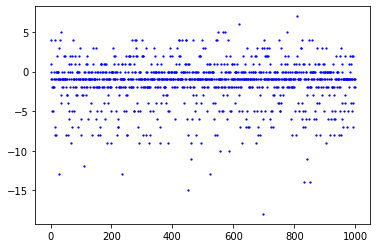

Trees beat paths in 168 runs
Paths beat trees in 661 runs
Both performed equally good in 171 runs


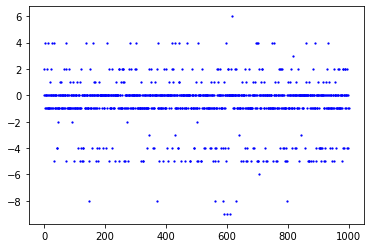

One Tree beat paths in 130 runs
Paths beat one tree in 433 runs
Both performed equally good in 437 runs


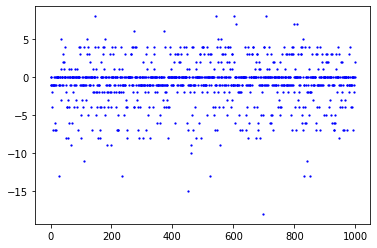

Multiple Trees beat One Tree in 189 runs
One Tree beat  multiple trees in 457 runs
Both performed equally good in 354 runs


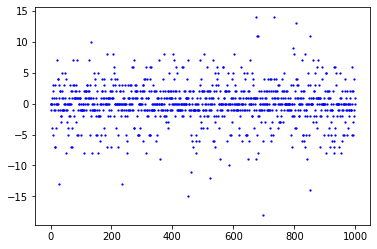

Ranked Trees beat Unranked Tree in 404 runs
Unranked Tree beat ranked trees in 371 runs
Both performed equally good in 225 runs


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,50,172,0.15,5,NaN,clustered,0.4;-0.3,17,5,2,15,0,2,0,3,2,1,0,edgeCount
1,999,50,158,0.15,7,NaN,clustered,0.4;-0.3,3,3,3,0,14,3,0,3,3,0,6,edgeCount
2,998,50,174,0.15,8,NaN,clustered,0.4;-0.3,7,3,3,4,28,3,0,7,10,4,8,edgeCount
3,997,50,172,0.15,4,NaN,clustered,0.4;-0.3,4,6,3,1,8,10,7,10,10,7,2,edgeCount
4,996,50,192,0.15,8,NaN,clustered,0.4;-0.3,3,6,2,1,6,4,2,7,4,5,2,edgeCount


Resilience Paths: 98.8988988988989%
Resilience One Tree: 99.7997997997998%
Resilience Trees: 100.0%


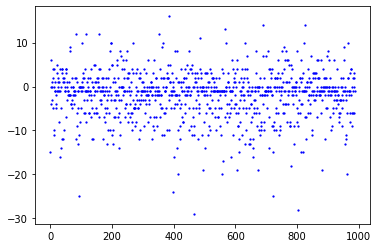

Trees beat paths in 276 runs
Paths beat trees in 601 runs
Both performed equally good in 111 runs


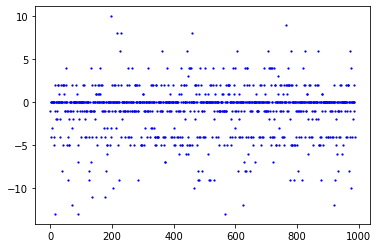

One Tree beat paths in 173 runs
Paths beat one tree in 382 runs
Both performed equally good in 433 runs


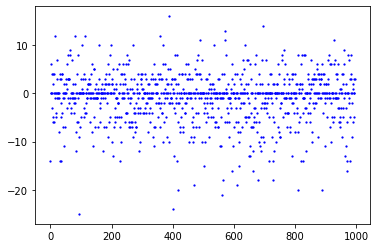

Multiple Trees beat One Tree in 305 runs
One Tree beat  multiple trees in 451 runs
Both performed equally good in 241 runs


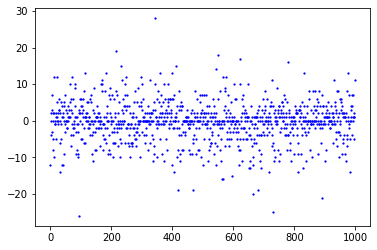

Ranked Trees beat Unranked Tree in 430 runs
Unranked Tree beat ranked trees in 408 runs
Both performed equally good in 161 runs


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,50,183,0.15,6,NaN,clustered,0.5;-0.3,8,23,2,6,0,2,0,10,2,8,0,edgeCount
1,999,50,163,0.15,6,NaN,clustered,0.5;-0.3,10,7,3,7,0,10,7,10,10,7,0,edgeCount
2,998,50,179,0.15,6,NaN,clustered,0.5;-0.3,8,12,3,5,0,22,19,16,16,13,0,edgeCount
3,997,50,174,0.15,8,NaN,clustered,0.5;-0.3,2,3,2,0,0,7,5,7,11,5,0,edgeCount
4,996,50,173,0.15,4,NaN,clustered,0.5;-0.3,29,17,3,26,0,9,6,9,9,6,0,edgeCount


Resilience Paths: 94.95967741935483%
Resilience One Tree: 97.68145161290323%
Resilience Trees: 99.59677419354838%


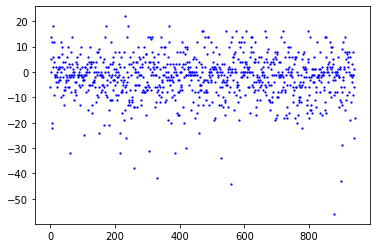

Trees beat paths in 334 runs
Paths beat trees in 531 runs
Both performed equally good in 77 runs


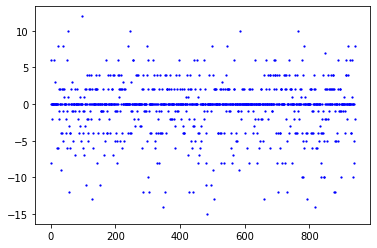

One Tree beat paths in 218 runs
Paths beat one tree in 281 runs
Both performed equally good in 443 runs


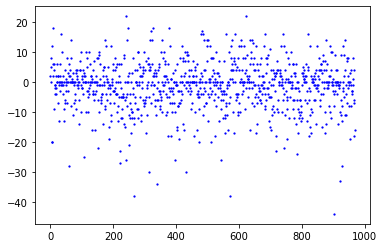

Multiple Trees beat One Tree in 354 runs
One Tree beat  multiple trees in 478 runs
Both performed equally good in 137 runs


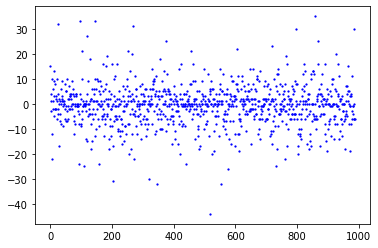

Ranked Trees beat Unranked Tree in 416 runs
Unranked Tree beat ranked trees in 454 runs
Both performed equally good in 118 runs


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,50,178,0.15,3,NaN,clustered,0.6;-0.3,-1,-1,4,-5,0,-1,-5,-1,-1,-5,0,edgeCount
1,999,50,198,0.15,6,NaN,clustered,0.6;-0.3,4,12,3,1,24,7,4,3,3,0,6,edgeCount
2,998,50,196,0.15,5,NaN,clustered,0.6;-0.3,18,9,3,15,54,9,6,7,35,4,16,edgeCount
3,997,50,159,0.15,5,NaN,clustered,0.6;-0.3,10,21,4,6,6,22,18,22,30,18,2,edgeCount
4,996,50,207,0.15,5,NaN,clustered,0.6;-0.3,20,18,4,16,0,-1,-5,-1,-1,-5,0,edgeCount


Resilience Paths: 82.72632674297607%
Resilience One Tree: 90.32258064516128%
Resilience Trees: 97.60665972944848%


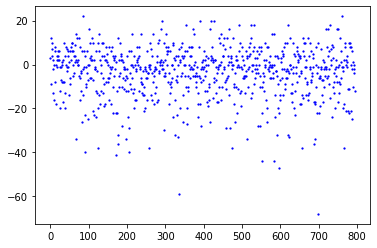

Trees beat paths in 292 runs
Paths beat trees in 451 runs
Both performed equally good in 52 runs


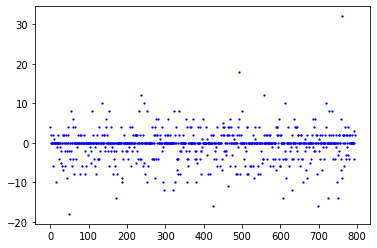

One Tree beat paths in 175 runs
Paths beat one tree in 218 runs
Both performed equally good in 402 runs


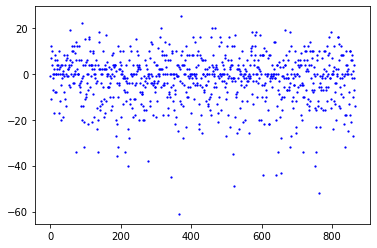

Multiple Trees beat One Tree in 325 runs
One Tree beat  multiple trees in 441 runs
Both performed equally good in 100 runs


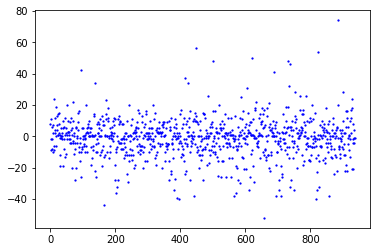

Ranked Trees beat Unranked Tree in 412 runs
Unranked Tree beat ranked trees in 445 runs
Both performed equally good in 81 runs


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,1000,50,167,0.15,7,NaN,clustered,0.7;-0.3,17,9,3,14,0,3,0,9,9,6,0,edgeCount
1,999,50,173,0.15,6,NaN,clustered,0.7;-0.3,10,34,4,6,12,22,18,22,22,18,4,edgeCount
2,998,50,184,0.15,8,NaN,clustered,0.7;-0.3,20,23,3,17,0,7,4,7,7,4,0,edgeCount
3,997,50,184,0.15,4,NaN,clustered,0.7;-0.3,3,5,3,0,36,7,4,7,5,4,10,edgeCount
4,996,50,183,0.15,5,NaN,clustered,0.7;-0.3,22,17,4,18,24,-1,-5,-1,-1,-5,8,edgeCount


Resilience Paths: 51.81159420289855%
Resilience One Tree: 58.212560386473434%
Resilience Trees: 79.95169082125604%


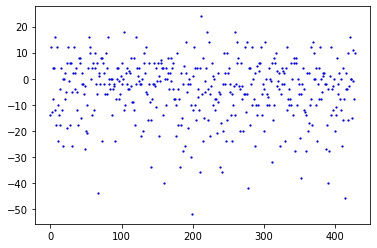

Trees beat paths in 151 runs
Paths beat trees in 253 runs
Both performed equally good in 25 runs


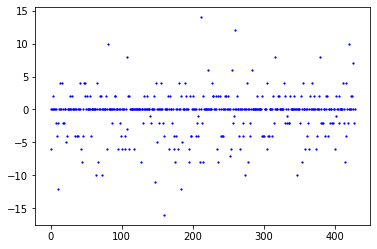

One Tree beat paths in 79 runs
Paths beat one tree in 115 runs
Both performed equally good in 235 runs


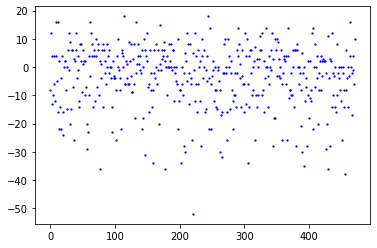

Multiple Trees beat One Tree in 181 runs
One Tree beat  multiple trees in 251 runs
Both performed equally good in 40 runs


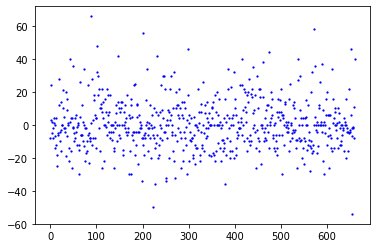

Ranked Trees beat Unranked Tree in 280 runs
Unranked Tree beat ranked trees in 320 runs
Both performed equally good in 62 runs


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,999,50,169,0.15,8,NaN,clustered,0.7999999999999999;-0.3,-1,-1,4,-5,0,-1,-5,-1,-1,-5,0,edgeCount
1,998,50,186,0.15,6,NaN,clustered,0.7999999999999999;-0.3,4,6,4,0,32,-1,-5,12,8,8,8,edgeCount
2,996,50,172,0.15,8,NaN,clustered,0.7999999999999999;-0.3,19,35,3,16,6,3,0,5,5,2,2,edgeCount
3,993,50,168,0.15,5,NaN,clustered,0.7999999999999999;-0.3,16,10,4,12,0,-1,-5,-1,-1,-5,0,edgeCount
4,991,50,175,0.15,6,NaN,clustered,0.7999999999999999;-0.3,-1,-1,5,-6,20,-1,-6,-1,-1,-6,8,edgeCount


Resilience Paths: 27.342256214149142%
Resilience One Tree: 31.73996175908222%
Resilience Trees: 48.37476099426386%


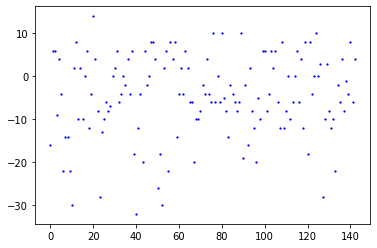

Trees beat paths in 46 runs
Paths beat trees in 88 runs
Both performed equally good in 9 runs


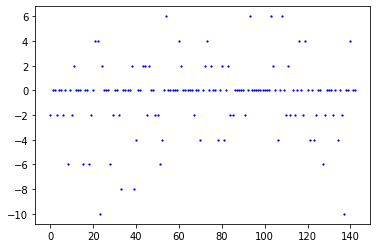

One Tree beat paths in 24 runs
Paths beat one tree in 41 runs
Both performed equally good in 78 runs


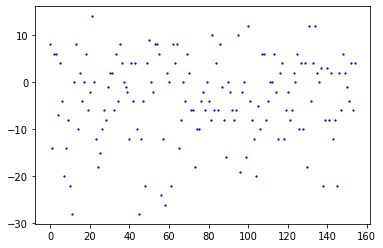

Multiple Trees beat One Tree in 52 runs
One Tree beat  multiple trees in 89 runs
Both performed equally good in 14 runs


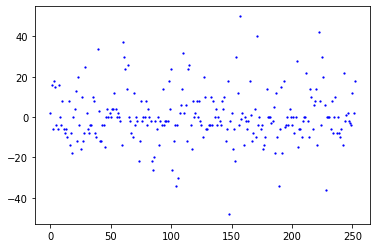

Ranked Trees beat Unranked Tree in 93 runs
Unranked Tree beat ranked trees in 127 runs
Both performed equally good in 33 runs


,rep,nrNodes,nrEdges,edgeProb,nrPaths,nrFails,failureModel,failurePercent,hopsRanked,hopsUnranked,spLength,stretch_mult,nodeAdditions,hopsPath,stretch_path,hopsRankedOne,hopsUnrankedOne,stretch_one,overallNodeAdditionsOne,treeChoice
0,992,50,186,0.15,5,NaN,clustered,0.8999999999999999;-0.3,-1,-1,4,-5,18,-1,-5,-1,-1,-5,6,edgeCount
1,986,50,190,0.15,6,NaN,clustered,0.8999999999999999;-0.3,-1,-1,5,-6,0,-1,-6,-1,-1,-6,0,edgeCount
2,976,50,202,0.15,5,NaN,clustered,0.8999999999999999;-0.3,-1,-1,5,-6,24,-1,-6,-1,-1,-6,6,edgeCount
3,967,50,179,0.15,3,NaN,clustered,0.8999999999999999;-0.3,-1,-1,5,-6,16,-1,-6,-1,-1,-6,6,edgeCount
4,959,50,194,0.15,7,NaN,clustered,0.8999999999999999;-0.3,13,3,3,10,10,-1,-4,-1,-1,-4,4,edgeCount


Resilience Paths: 15.306122448979592%
Resilience One Tree: 17.346938775510203%
Resilience Trees: 25.510204081632654%


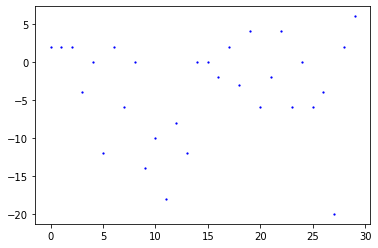

Trees beat paths in 9 runs
Paths beat trees in 16 runs
Both performed equally good in 5 runs


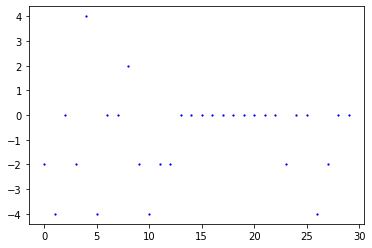

One Tree beat paths in 2 runs
Paths beat one tree in 11 runs
Both performed equally good in 17 runs


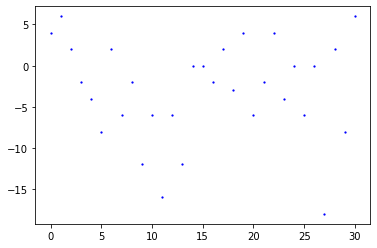

Multiple Trees beat One Tree in 9 runs
One Tree beat  multiple trees in 18 runs
Both performed equally good in 4 runs


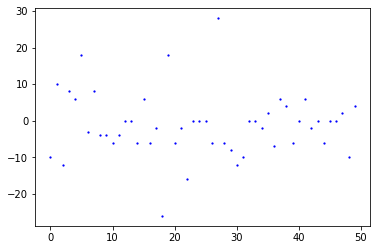

Ranked Trees beat Unranked Tree in 14 runs
Unranked Tree beat ranked trees in 25 runs
Both performed equally good in 11 runs


In [33]:
for i in range(nrFiles):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP)
    

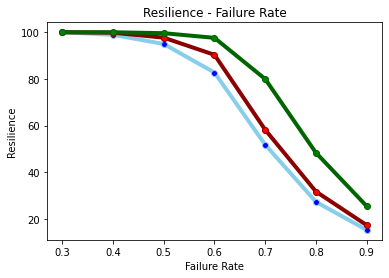

In [35]:
import matplotlib.pyplot as plt
xVals = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.plot(xVals, rPaths, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4)
plt.plot(xVals, rOne, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=4)
plt.plot(xVals, rMult, marker='o', markerfacecolor='green', markersize=6, color='darkgreen', linewidth=4)
plt.title('Resilience - Failure Rate')
plt.xlabel('Failure Rate')
plt.ylabel('Resilience')
plt.show()

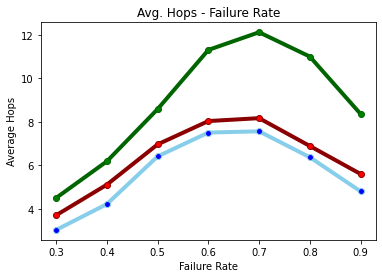

In [36]:
import matplotlib.pyplot as plt

plt.plot(xVals, yAvgsPaths, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4)
plt.plot(xVals, yAvgsOne, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=4)
plt.plot(xVals, yAvgsMult, marker='o', markerfacecolor='green', markersize=6, color='darkgreen', linewidth=4)
plt.title('Avg. Hops - Failure Rate')
plt.xlabel('Failure Rate')
plt.ylabel('Average Hops')
plt.show()

In [15]:
import numpy as np

percentAvgsOneToPaths = []
percentAvgsMultToPaths = []

def getIncrease(val1, val2):
    return (abs(val2 - val1) / val1) * 100.0

for i in range(len(yAvgsPaths)):
    percentAvgsOneToPaths.append(getIncrease(yAvgsPaths[i], yAvgsOne[i]))
    percentAvgsMultToPaths.append(getIncrease(yAvgsPaths[i], yAvgsMult[i]))

percentAvgsOneToPaths

[22.369291859695572,
 21.23978856319079,
 8.630114295179721,
 7.05428954423592,
 8.012326656394446,
 8.122941822173436,
 16.666666666666664]

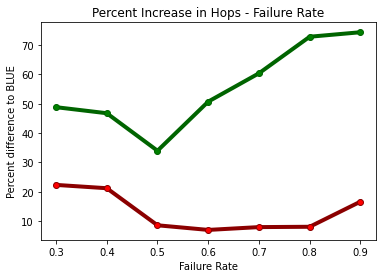

In [37]:
import matplotlib.pyplot as plt

plt.plot(xVals, percentAvgsOneToPaths, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=4)
plt.plot(xVals, percentAvgsMultToPaths, marker='o', markerfacecolor='green', markersize=6, color='darkgreen', linewidth=4)

plt.title('Percent Increase in Hops - Failure Rate')
plt.xlabel('Failure Rate')
plt.ylabel('Percent difference to BLUE')
plt.show()

In [38]:
import numpy as np

percentAvgsOneToSP = []
percentAvgsMultToSP = []
percentAvgsPathsToSP = []

def getIncrease(val1, val2):
    return (abs(val2 - val1) / val1) * 100.0

for i in range(len(yAvgsPaths)):
    percentAvgsOneToSP.append(getIncrease(yAvgsSP[i], yAvgsOne[i]))
    print('avg sp:', yAvgsSP[i])
    print('avg one:', yAvgsOne[i])
    print('increase:', getIncrease(yAvgsSP[i], yAvgsOne[i]), '\n')
    
    percentAvgsMultToSP.append(getIncrease(yAvgsSP[i], yAvgsMult[i]))
    percentAvgsPathsToSP.append(getIncrease(yAvgsSP[i], yAvgsPaths[i]))


avg sp: 2.413
avg one: 3.698
increase: 53.25321176958144 

avg sp: 2.5785785785785786
avg one: 5.107287449392713
increase: 98.06600007543945 

avg sp: 2.78125
avg one: 6.961783439490445
increase: 150.31131467830815 

avg sp: 2.9979188345473466
avg one: 8.036477987421383
increase: 168.06856459257025 

avg sp: 3.393719806763285
avg one: 8.17016317016317
increase: 140.7435980389717 

avg sp: 3.9139579349904396
avg one: 6.888111888111888
increase: 75.98839850916062 

avg sp: 4.3979591836734695
avg one: 5.6
increase: 27.331786542923425 



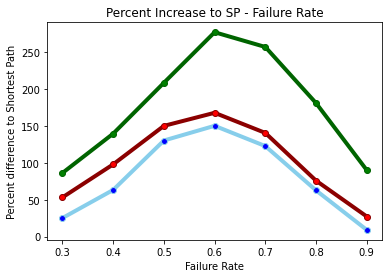

In [18]:
import matplotlib.pyplot as plt

plt.plot(xVals, percentAvgsOneToSP, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=4)
plt.plot(xVals, percentAvgsMultToSP, marker='o', markerfacecolor='green', markersize=6, color='darkgreen', linewidth=4)
plt.plot(xVals, percentAvgsPathsToSP, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4)

plt.title('Percent Increase to SP - Failure Rate')
plt.xlabel('Failure Rate')
plt.ylabel('Percent difference to Shortest Path')
plt.show()

In [ ]:
#do for adversarial and random model too

In [ ]:
#gutes n und p finden in literatur

In [ ]:
#do relative drop-off!